# Analysis

In [2]:
import keras
from keras.layers.normalization import BatchNormalization 
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten,Lambda
from keras.layers.normalization import BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.preprocessing.image import load_img,img_to_array
from keras.optimizers import SGD, Adam, RMSprop
from keras.callbacks import EarlyStopping,History
from keras.preprocessing.image import load_img
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

import os
import pandas as pd
import numpy as np
import csv
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import scipy.misc
import random
from os import getcwd
from scipy.ndimage import rotate
from scipy.stats import bernoulli

from pandas.io.parsers import read_csv
from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split
from keras.models import Sequential, Model
from keras.layers import Dense, Convolution2D, Flatten
from keras.layers import Dropout, Lambda, ELU, Cropping2D
from keras.optimizers import Adam, RMSprop, SGD
from keras.layers.pooling import MaxPooling2D
from keras.regularizers import l2, activity_l2
from keras.callbacks import LearningRateScheduler, EarlyStopping, ModelCheckpoint
from keras import initializations
from keras.models import model_from_json
from keras import backend as K
import json
%matplotlib inline


Using TensorFlow backend.
/home/hkkim/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
aDATA_PATH = './data/'
csvfile = 'Udacity_driving_log.csv'
csv_path1 = aDATA_PATH + csvfile
print(csv_path1)

data = pd.read_csv(csv_path1)
data.head()
    
    

./data/Udacity_driving_log.csv


,center,left,right,steering,throttle,brake,speed
0,IMG/center_2016_12_01_13_30_48_287.jpg,IMG/left_2016_12_01_13_30_48_287.jpg,IMG/right_2016_12_01_13_30_48_287.jpg,0.0,0.0,0.0,22.148290
1,IMG/center_2016_12_01_13_30_48_404.jpg,IMG/left_2016_12_01_13_30_48_404.jpg,IMG/right_2016_12_01_13_30_48_404.jpg,0.0,0.0,0.0,21.879630
2,IMG/center_2016_12_01_13_31_12_937.jpg,IMG/left_2016_12_01_13_31_12_937.jpg,IMG/right_2016_12_01_13_31_12_937.jpg,0.0,0.0,0.0,1.453011
3,IMG/center_2016_12_01_13_31_13_037.jpg,IMG/left_2016_12_01_13_31_13_037.jpg,IMG/right_2016_12_01_13_31_13_037.jpg,0.0,0.0,0.0,1.438419
4,IMG/center_2016_12_01_13_31_13_177.jpg,IMG/left_2016_12_01_13_31_13_177.jpg,IMG/right_2016_12_01_13_31_13_177.jpg,0.0,0.0,0.0,1.418236


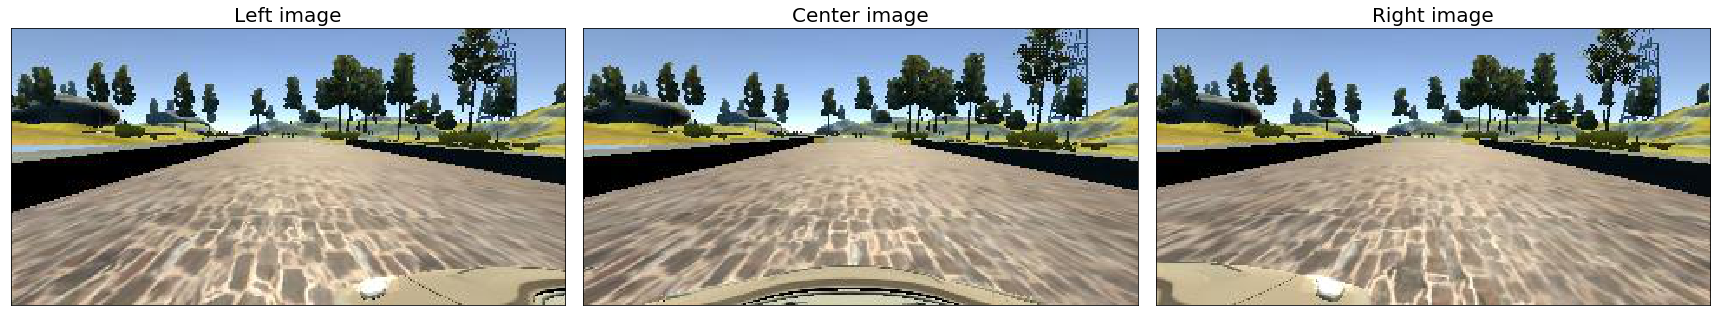

In [4]:
img_left=load_img('./data/IMG/left_2016_12_01_13_30_48_287.jpg')
img_center=load_img('./data/IMG/center_2016_12_01_13_30_48_287.jpg')
img_right=load_img('./data/IMG/right_2016_12_01_13_30_48_287.jpg')
f,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(24,8))
ax1.imshow(img_left)
ax1.set_xticks([]);ax1.set_yticks([])
ax1.set_title("Left image",fontsize=20)
ax2.imshow(img_center)
ax2.set_xticks([]);ax2.set_yticks([])
ax2.set_title("Center image",fontsize=20)
ax3.imshow(img_right)
ax3.set_xticks([]);ax3.set_yticks([])
ax3.set_title("Right image",fontsize=20)
f.tight_layout()
plt.savefig('./results/loadimages.png')


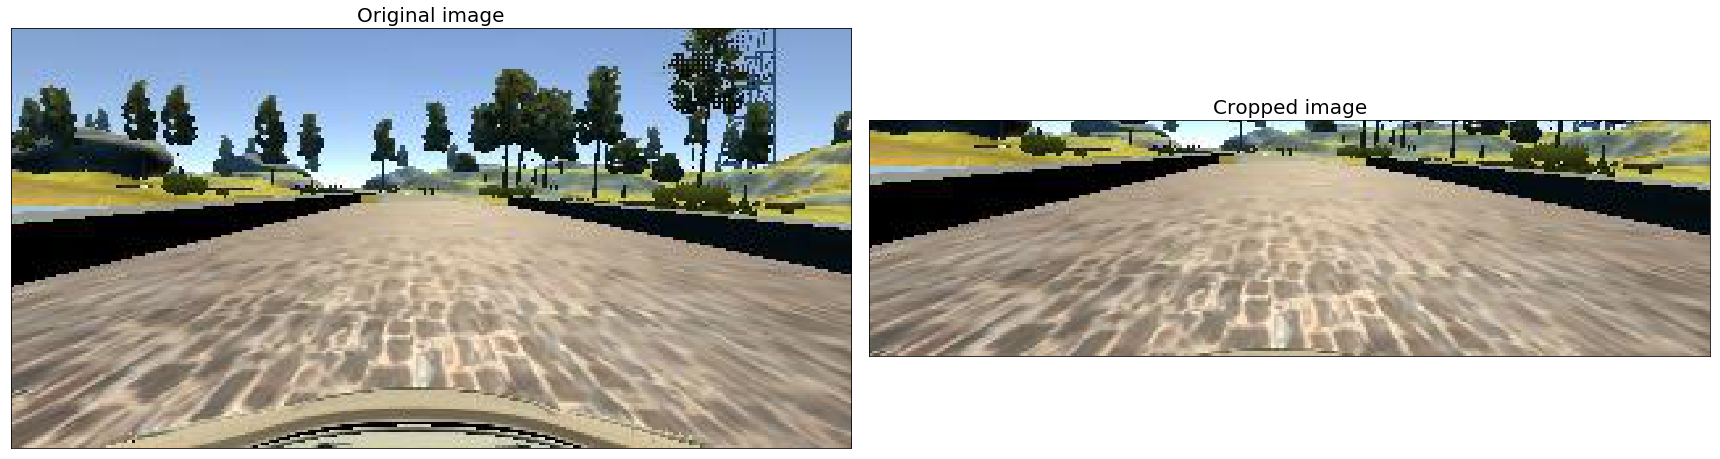

In [5]:
img=load_img('./data/IMG/center_2016_12_01_13_30_48_287.jpg')
img = np.array(img)
cropped_img = img[50:img.shape[0]-20,:]
#resized = cv2.resize(cropped_img,(200,66), interpolation=cv2.INTER_AREA)
f,(ax1,ax2) = plt.subplots(1,2,figsize=(24,8))
ax1.imshow(img)
ax1.set_xticks([]);ax1.set_yticks([])
ax1.set_title("Original image",fontsize=20)
ax2.imshow(cropped_img)
ax2.set_xticks([]);ax2.set_yticks([])
ax2.set_title("Cropped image",fontsize=20)
#ax3.imshow(resized)
#ax3.set_xticks([]);ax3.set_yticks([])
#ax3.set_title("Resized image",fontsize=20)
f.tight_layout()
plt.savefig('./results/Cropimage.png')


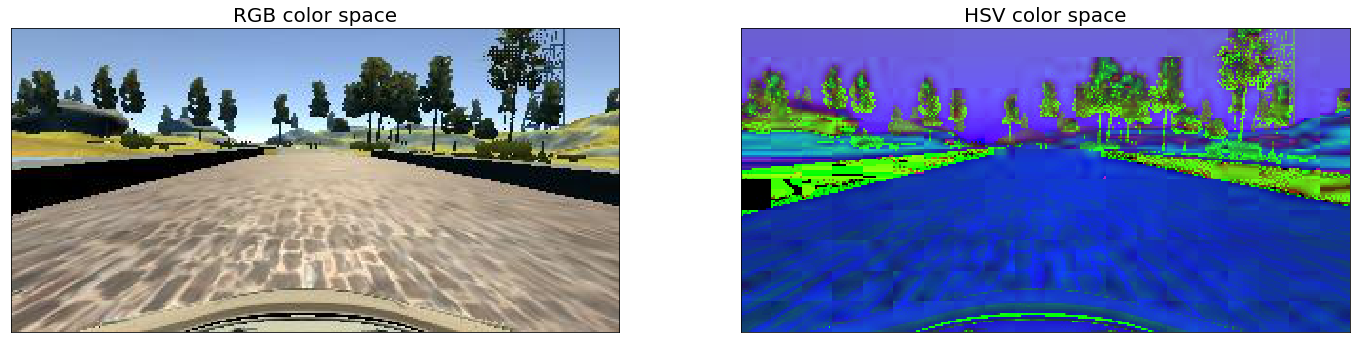

In [6]:
img=load_img('./data/IMG/center_2016_12_01_13_30_48_287.jpg')
img_yuv = cv2.cvtColor(np.asarray(img),cv2.COLOR_RGB2HSV)
f,(ax1,ax2) = plt.subplots(1,2,figsize=(24,8)) 
ax1.imshow(img)
ax1.set_xticks([]);ax1.set_yticks([])
ax1.set_title("RGB color space",fontsize=20)
ax2.imshow(img_yuv)
ax2.set_xticks([]);ax2.set_yticks([])
ax2.set_title("HSV color space",fontsize=20)
plt.savefig('./results/HSVimage.png')


In [8]:
def random_brightness_modi(image, median=0.8, dev=0.4):
    hsv = cv2.cvtColor(np.asarray(image),cv2.COLOR_RGB2HSV)
    random_bright = median + dev * np.random.uniform(-1.0, 1.0)
    hsv[:,:,2] = hsv[:,:,2]*random_bright

    rgb = cv2.cvtColor(hsv,cv2.COLOR_HSV2RGB)
    return rgb, random_bright

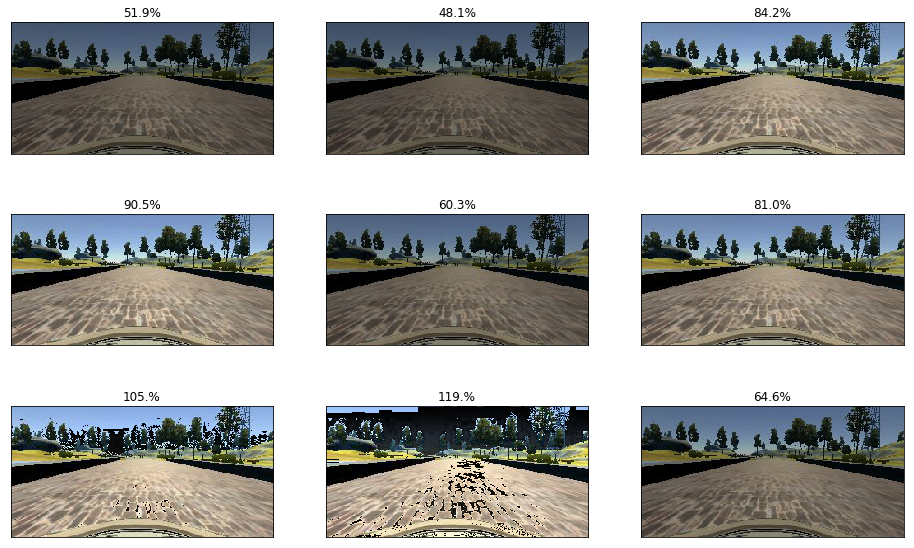

In [10]:
img=load_img('./data/IMG/center_2016_12_01_13_30_48_287.jpg')
fig = plt.figure(figsize=(16,10))
for i in range(9):
    new_img, bright = random_brightness_modi(img)
    subplot = fig.add_subplot(3,3,(i+1))
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(new_img,interpolation="nearest")
    subplot.set_title(str(bright*100)[:4]+"%")
    
plt.savefig('./results/random_brightness.png')


In [12]:
def random_flip_modi(image, steering_angle):
    return np.fliplr(image), -1 * steering_angle

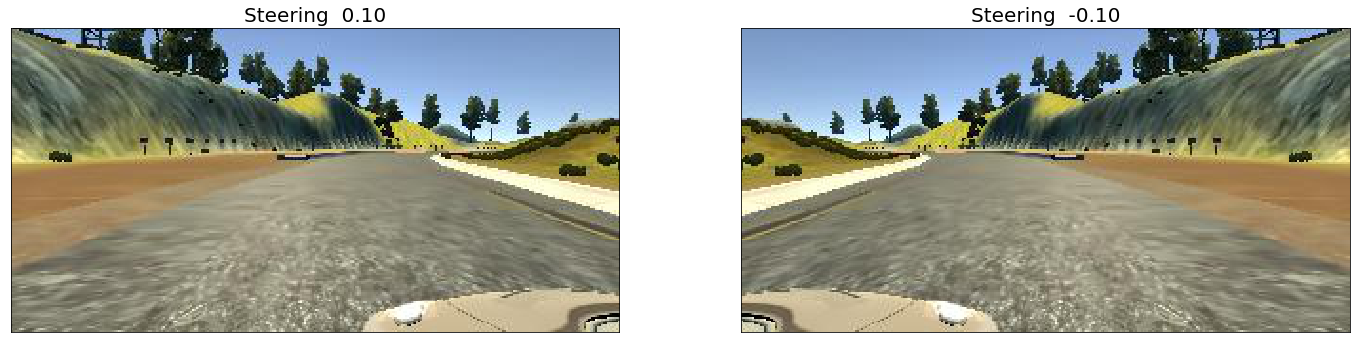

In [13]:
index = 1430
#original = data.iloc[index]
Left_img_subpath = data.iloc[index]['left'].strip()
Left_img_path = './data/'+Left_img_subpath
#print(Left_img_path)
angle = data.iloc[index]['steering']
#print(angle)
    
#img=load_img('./data/IMG/center_2016_12_01_13_30_48_287.jpg')
Left_img = load_img(Left_img_path)
Left_img = np.array(Left_img)
img_flip, fliped_angle = random_flip_modi(Left_img, angle)
f,(ax1,ax2) = plt.subplots(1,2,figsize=(24,8)) 
ax1.imshow(Left_img)
ax1.set_xticks([]);ax1.set_yticks([])
ax1.set_title("Steering  "+str(angle)[:4],fontsize=20)
ax2.imshow(img_flip)
ax2.set_xticks([]);ax2.set_yticks([])
ax2.set_title("Steering  "+str(fliped_angle)[:5],fontsize=20)
plt.savefig('./results/fliped_Image.png')


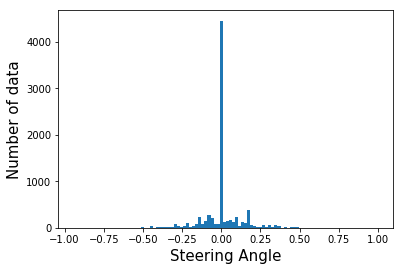

In [14]:
driving_log = pd.read_csv(csv_path1).reset_index()
plt.hist(driving_log["steering"],bins=100)

plt.xlabel("Steering Angle",fontsize=15)
plt.ylabel("Number of data",fontsize=15)
plt.savefig('./results/Steering_Angle_Distribution.png')

In [15]:
# NVIDIA model
# https://images.nvidia.com/content/tegra/automotive/images/2016/solutions/pdf/end-to-end-dl-using-px.pdf

def get_model():

    input_shape = (160, 320, 3)
    start = 0.001
    stop = 0.001
    nb_epoch = 10

    model = Sequential()
    model.add(Lambda(lambda x: x/127.5 - 1.,input_shape=input_shape,output_shape=input_shape))
    model.add(Cropping2D(cropping=((50,20),(0,0))))
    model.add(Convolution2D(24, 5, 5, subsample=(2, 2), border_mode='valid', W_regularizer=l2(0.001)))
    model.add(ELU())
    model.add(Convolution2D(36, 5, 5, subsample=(2, 2), border_mode='valid', W_regularizer=l2(0.001)))
    model.add(ELU())
    model.add(Convolution2D(48, 5, 5, subsample=(2, 2), border_mode='valid', W_regularizer=l2(0.001)))
    model.add(ELU())

    model.add(Convolution2D(64, 3, 3, border_mode='valid', W_regularizer=l2(0.001)))
    model.add(ELU())
    model.add(Convolution2D(64, 3, 3, border_mode='valid', W_regularizer=l2(0.001)))
    model.add(ELU())

    model.add(Flatten())

    model.add(Dense(100, W_regularizer=l2(0.001)))
    model.add(ELU())
    model.add(Dropout(0.5))

    model.add(Dense(50, W_regularizer=l2(0.001)))
    model.add(ELU())
    model.add(Dropout(0.5))

    model.add(Dense(10, W_regularizer=l2(0.001)))
    model.add(ELU())

    model.add(Dense(1))

    adam = Adam(lr=start, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
    model.compile(loss='mse', optimizer=adam)
    return model

In [16]:
# Get the model
model = get_model()
print(model.summary())

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_1 (Lambda)                (None, 160, 320, 3)   0           lambda_input_1[0][0]             
____________________________________________________________________________________________________
cropping2d_1 (Cropping2D)        (None, 90, 320, 3)    0           lambda_1[0][0]                   
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 43, 158, 24)   1824        cropping2d_1[0][0]               
____________________________________________________________________________________________________
elu_1 (ELU)                      (None, 43, 158, 24)   0           convolution2d_1[0][0]            
___________________________________________________________________________________________